# Stoneburner, Kurt
- ## DSC 540 - Week 05/06
- ## Chapter 5, Activity7

In this activity you are given the Wikipedia page where we have the GDP of all countries listed and you are asked to create three data frames from the three sources mentioned in the page ( link - https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal) )

You will have to -

- Open the page in a separate chrome/firefox tab and use something like `inspect element` tool to see the source HTML and understand the structure
- Read the page using bs4
- Find the table structure you will need to deal with (how many tables are there)
- Find the right table using bs4
- Separate the Source Names and their corresponding data
- Get the source names from the list of sources you have created
- Seperate the header and data from the data that you separated before. For the first source only. And then create a DataFrame using that
- Repeat the last task for the other two data sources.

In [1]:
# //****************************************************************************************
# //*** Set Working Directory to thinkstats folder.
# //*** This pseudo-relative path call should work on all Stoneburner localized projects. 
# //****************************************************************************************

import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
#//*** Going to use the requests library, since it's the same library used for API calls
import requests
import sqlite3

Resource:
- https://generalistprogrammer.com/python/python-web-scraping-tutorial-with-beautifulsoup-and-requests/


In [2]:
#//*** Use Requests to get the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
response = requests.get(url)

In [3]:
#//*** Verify Response is ok. This *should* be analogous to checking if the response code is 200
if response.ok == True: 
    #//*** Make soup...Beautiful Soup
    soup = BeautifulSoup(response.content,'html.parser')
else:
    print("Problem with the URL Request")
    
#//*** The tables all have the class name wikitable
#//*** Discard the first table, which is a container for the other three.
tables = soup.find_all('table', class_='wikitable')[1:]

In [4]:
#//*** Use the tableCounter to keep track of which table we are working in.
#//*** If we were super cool, we'd tie something in to using the first row of the maintable to keep track of 
#//*** Of which table/dataframe is which. But since we are looking for very specific things, it doesn't make
#//*** sense to invest in a more robust structure, since any slight change of source code will break the
#//*** whole scrape.

#//*** Personally, I'd skip Beautiful Soup and just use Regex. Mostly, because regex is universal and be applies
#//*** to other scenarios as well as other languages. It is is very useful across many tasks. I've also written 
#//*** an HTML parser in javascript using HTML. It was for a project where news talent reads scripts off of an iPad
#//*** instead of paper scripts.

#//*** The book uses a very pythonic single line method to generate a multi dimensional array. I'm not a fan of 
#//*** that in general. I prefer more readable verbose code.

#//*** We'll deviate from the assignment a bit by handling all three tables in a loop. What works once
#//*** should work thrice.

#//*** tableCounter helps keep track of which of the three tables we are working in. This is required
#//*** when determining which of the three dataframes to build
tableCounter = 0

#//*** Parse Each table
for table in tables:
    tableCounter+=1
    
    #//************************************
    #//*** Build Table Headers
    #//************************************
    #//*** Get the Table Headers. These will be our data frame Columns.
    ths = table.find_all("th")
    #//*** initialize a list to hold the column names
    colnames = []
    
    #//*** Columnnames are the first value contained in contents
    for th in ths:
        colnames.append(th.contents[0])
    
    #//**********************************
    #//*** Initialize tableDict.
    #//**********************************
    #//*** tableDict is a dictionary container to hold row data.
    #//*** The tableDict will hold each of the row lists. The keys will be each colname
    tableDict = {}
    
    #//*** Initialize tableDict
    for name in colnames:
        tableDict[name] = []
    
    #//***********************************************
    #//*** Process each tablerow
    #//*** The sausage is primarily made here
    #//***********************************************
    
    #//*** Get a BS list of table rows 
    trs = table.find_all("tr")
    
    #//*** For each table row in tablerows
    for tr in trs:
        #//*** Skip the table header
        if len(tr.find_all("th")) == 0:
            #//*** Loop through the colnames Index
            #//*** The gets the key value to store the TD data
            #//*** Get a TD with a corresponding index value and extract the text
            for x in range(0,len(colnames)):
                #//*** Append the text to the appropriate colname list.
                #//*** Using index values keeps everthing aligned.
                tableDict[colnames[x]].append(tr.find_all('td')[x].text.replace("\n",""))
    
    #//**************************************************************************************
    #//*** Table is fully parsed into the tableDict
    #//*** Remove the first element of each list. It contains the World Summary numbers
    #//**************************************************************************************
    for key in tableDict.keys():
        tableDict[key].pop(0)
        
    #//*********************************************************
    #//*** Convert tableDict into a dataframe.
    #//*** the individual df is determined by the tableCounter
    #//*********************************************************
    if tableCounter == 1:
        #//*** Create the IMF Dataframe
        imf_df = pd.DataFrame()
        
        #//*** Add each Column to dataframe
        for x in colnames:
            imf_df[x] = tableDict[x]
    
    elif tableCounter == 2:
        #//*** Create the IMF Dataframe
        worldbank_df = pd.DataFrame()
        
        #//*** Add each Column to dataframe
        for x in colnames:
            worldbank_df[x] = tableDict[x]
        
    elif tableCounter == 3:
        #//*** Create the IMF Dataframe
        un_df = pd.DataFrame()
        
        #//*** Add each Column to dataframe
        for x in colnames:
            un_df[x] = tableDict[x]
    
#//*********************************************************
#//*** END table in tables
#//*********************************************************
        


In [5]:
        print("\n#############")
        print("IMF")
        print("#############")
        print(imf_df.head())

        print("\n#############")
        print("World Bank")
        print("#############")
        print(worldbank_df.head())
        
        print("\n#############")
        print("UN")
        print("#############")
        print(un_df.head())



#############
IMF
#############
  Rank Country/Territory         GDP
0    1     United States  20,807,269
1    2   China[n 2][n 3]  14,860,775
2    3             Japan   4,910,580
3    4           Germany   3,780,553
4    5    United Kingdom   2,638,296

#############
World Bank
#############
  Rank Country/Territory         GDP
0    1     United States  21,427,700
1    2        China[n 9]  14,342,903
2    3             Japan   5,081,770
3    4           Germany   3,845,630
4    5             India   2,875,142

#############
UN
#############
  Rank Country/Territory         GDP
0    1     United States  21,433,226
1    2        China[n 9]  14,342,933
2    3             Japan   5,082,465
3    4           Germany   3,861,123
4    5             India   2,891,582


# Chapter 6, Activity 08

In this activity we do the following

* Create a data frame from a given CSV
* Check for duplicates in the columns that matter
* Check for NaN in the columns that matter
* Apply our domain knowledge to single out and remove outliers
* Generate nice print statements as reports for differents steps

The data set is a 1000 row data set which represnets the traffic on a certain page of a website. The Names, email, and IP are faked out in order to keep the privacy

### Load the data (the file name is - visit_data.csv)

In [6]:
### Write your code bellow this comment
base_df = pd.read_csv("z_sup_wk05_06_visit_data.csv")
print(base_df.head())


   id first_name last_name                       email gender  \
0   1      Sonny      Dahl            sdahl0@mysql.com   Male   
1   2        NaN       NaN           dhoovart1@hud.gov    NaN   
2   3        Gar     Armal      garmal2@technorati.com    NaN   
3   4    Chiarra     Nulty       cnulty3@newyorker.com    NaN   
4   5        NaN       NaN  sleaver4@elegantthemes.com    NaN   

        ip_address   visit  
0    135.36.96.183  1225.0  
1  237.165.194.143   919.0  
2   166.43.137.224   271.0  
3   139.98.137.108  1002.0  
4    46.117.117.27  2434.0  


### Task - 1 (Are there duplicates?)

In [7]:
#//*** Use df.duplicated() to test for duplicate values in any row.
print( f"Test for Duplicate Email addresses: {base_df['email'].duplicated().any()}")
print("There don't appear to be duplicates in the data set")

Test for Duplicate Email addresses: False
There don't appear to be duplicates in the data set


### Task - 2 (do any essential column contain NaN?)

In [8]:
#//*** Build a list containing the essential column names
essential_cols = ['id', 'email', 'ip_address','visit']

#//*** Loop through the essential column names checking for NaN values.
for col in essential_cols:
    print(f"Number of NaN in {col}: {sum(base_df[col].isna()==True)}")

print("The website traffic, visit column contains 26 NaN. These are likely outliers.")

Number of NaN in id: 0
Number of NaN in email: 0
Number of NaN in ip_address: 0
Number of NaN in visit: 26
The website traffic, visit column contains 26 NaN. These are likely outliers.


### Task - 3 (Get rid of the outliers)

Consider what are the essential columns if you are preparing this dataset for a model building exercise where the target is to predict number of visits given a user name, email, IP address, Gender etc.

In [9]:
#//*** Get the length of the dataframe before values are dropped.
orig_len = len(base_df)

#//*** Drop rows with NaN in the visit column.
base_df = base_df.dropna(subset=['visit'])

### Task - 4 (Report the size difference)

The `shape` method of a data frame gives you a tuple which represents (row, column) of the data frame, in this task you have to compare and report the number of rows before and after getting rid of the outliers

In [10]:
#//*** Use orig_len to display the original number of rows before dropping the Nans from visit
print(f"Orginal Dataframe length: {orig_len} rows")

#//*** Use df.shape() to report the dimensionality of the dataframe.
print(f"After removing NaN {orig_len - base_df.shape[0]} visits, the length is: {base_df.shape[0]} rows and {base_df.shape[1]} columns")

Orginal Dataframe length: 1000 rows
After removing NaN 26 visits, the length is: 974 rows and 7 columns


### Task - 5 (Box plot visit to further check any Outliers)

{'whiskers': [<matplotlib.lines.Line2D at 0x15afe4c8eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x15afe4df5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15afe4c8b50>],
 'medians': [<matplotlib.lines.Line2D at 0x15afe4dfc70>],
 'fliers': [<matplotlib.lines.Line2D at 0x15afe4dff70>],
 'means': []}

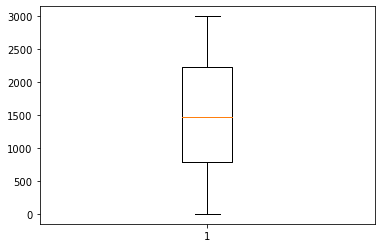

In [11]:
plt.boxplot(base_df['visit'])

 Insert data into a SQL Lite database – create a table with the following data (Hint: Python for Data Analysis page 191):

a. Name, Address, City, State, Zip, Phone Number

b. Add at least 10 rows of data and submit your code with a query generating your results.

In [12]:
#//*** Added the Faker Library to generate fake people.
#//*** https://pypi.org/project/Faker/
from faker import Faker

In [13]:
#//*** Build 100 fake people
#//*** It's a loop, why stop at 10 people? Let's make it 100 hundred for grins and giggles.
fake = Faker()

#//**** People is a list containing a dictionary of people
people = []
for _ in range(100):
    #//*** Store each entry in a person dictionary. Add each person to the people list
    person = {}
    person["name"] = fake.name()
    person['address'] = fake.street_address()
    person['city'] = fake.city() 
    person['state'] = fake.state_abbr()
    person['zip'] = fake.zipcode_in_state()
    person['phone'] = fake.phone_number()
    people.append(person)

#//*** Display first 5 results, I mean people.
#//*** And you get different people each time this runs.
for x in range(5):
    print(people[x])
    

{'name': 'Anthony Marshall', 'address': '4296 Murphy Rapids', 'city': 'Cynthiafurt', 'state': 'IL', 'zip': '19939', 'phone': '(909)050-4619x69026'}
{'name': 'Gregg Baker', 'address': '2549 Ronald Walk', 'city': 'Port Jennifer', 'state': 'VA', 'zip': '95533', 'phone': '996.317.6960'}
{'name': 'Elizabeth Rich', 'address': '677 Michelle Pike', 'city': 'East Carolinefort', 'state': 'UT', 'zip': '60783', 'phone': '7460088038'}
{'name': 'Gregory Cordova', 'address': '279 Powell Haven', 'city': 'East Paul', 'state': 'SD', 'zip': '05111', 'phone': '+1-624-801-4556x01453'}
{'name': 'John Singleton', 'address': '70197 Carly Cliffs Suite 707', 'city': 'Andersonport', 'state': 'MT', 'zip': '37616', 'phone': '958-451-4571x48717'}


In [14]:
#//*** Build a new database
#//*** Start from scratch each run. Therefore delete any previous version
db_filename = 'people.sqldb'

#//*** Delete the previous db instance if it exists.
if os.path.exists(db_filename):
    os.remove(db_filename)
    
#//*** Start a database instance
con = sqlite3.connect(db_filename)

#//*** Build Table
#//*** Use Person keys() to build the column names. We'll keep all fields as VARCHAR(20) for simplicity
query = "CREATE TABLE People ("

#//*** person is the last person in the list. It's the last instance from the loop used to build the people list.
#//*** Normally this is considered a 'throw-away' variable. But since it's in memory, let's reuse it.
#//*** And each person() has the same values, so why not. 

#//*** This creates the columns (attributes) that we'll be filling.
for key in person.keys():
    query += f"{key} varchar(20), "

#//*** Trim the trailing ,
query = query[:-2]

query += ");"

print(query)

#//*** Execute Build TABLE query
con.execute(query)


#//*** Build Column name for INSERT
cols = "("
for key in person.keys():
    cols += f"{key}, "
cols = cols[:-2]
cols += ")"

print(cols)

#//*** Build the INSERT Query for each Person
#//*** Loop through each person
for person in people:
    data = "("
    #//*** Build the attributes/columns for each person
    for attrib in person:
        data += f"'{person[attrib]}', "
    #//*** Trim the trailing comma space.
    data = data[:-2]
    data += ")"
    #//*** Add each person individually to the db.
    con.execute(f"INSERT INTO People {cols} VALUES {data}")
    #//*** Commit the INSERT. I suppose we should verify that the INSERT was good. Perhaps in a production db.
    con.commit()
#//*** END - person in people
#//*** All people entered into the db.

#//*** Display the people in the database
cursor = con.execute("select * FROM People")
print(cursor.fetchall())

#//*** Close and Exit the Database. For 
con.close()
con.__exit__


CREATE TABLE People (name varchar(20), address varchar(20), city varchar(20), state varchar(20), zip varchar(20), phone varchar(20));
(name, address, city, state, zip, phone)
[('Anthony Marshall', '4296 Murphy Rapids', 'Cynthiafurt', 'IL', '19939', '(909)050-4619x69026'), ('Gregg Baker', '2549 Ronald Walk', 'Port Jennifer', 'VA', '95533', '996.317.6960'), ('Elizabeth Rich', '677 Michelle Pike', 'East Carolinefort', 'UT', '60783', '7460088038'), ('Gregory Cordova', '279 Powell Haven', 'East Paul', 'SD', '05111', '+1-624-801-4556x01453'), ('John Singleton', '70197 Carly Cliffs Suite 707', 'Andersonport', 'MT', '37616', '958-451-4571x48717'), ('Daniel Davis', '001 Mary Camp', 'Keithfurt', 'OH', '61165', '587-323-1592x6356'), ('Nicole Henry', '997 Mallory Hills Suite 208', 'Joneshaven', 'DC', '21923', '+1-328-684-0760'), ('Belinda Perkins', '724 Jeremy Parkways', 'Jessicamouth', 'NV', '84290', '(959)857-7657x41655'), ('Samuel Smith', '59699 Isabel Port', 'Porterview', 'AK', '40817', '(337)

<function Connection.__exit__>

In [15]:
#con.commit()
con.close()
con.__exit__


<function Connection.__exit__>

In [16]:
con.close()
con.__exit__

print(dir(os))
print(dir(con))

['DirEntry', 'F_OK', 'MutableMapping', 'O_APPEND', 'O_BINARY', 'O_CREAT', 'O_EXCL', 'O_NOINHERIT', 'O_RANDOM', 'O_RDONLY', 'O_RDWR', 'O_SEQUENTIAL', 'O_SHORT_LIVED', 'O_TEMPORARY', 'O_TEXT', 'O_TRUNC', 'O_WRONLY', 'P_DETACH', 'P_NOWAIT', 'P_NOWAITO', 'P_OVERLAY', 'P_WAIT', 'PathLike', 'R_OK', 'SEEK_CUR', 'SEEK_END', 'SEEK_SET', 'TMP_MAX', 'W_OK', 'X_OK', '_AddedDllDirectory', '_Environ', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_check_methods', '_execvpe', '_exists', '_exit', '_fspath', '_get_exports_list', '_putenv', '_unsetenv', '_wrap_close', 'abc', 'abort', 'access', 'add_dll_directory', 'altsep', 'chdir', 'chmod', 'close', 'closerange', 'cpu_count', 'curdir', 'defpath', 'device_encoding', 'devnull', 'dup', 'dup2', 'environ', 'error', 'execl', 'execle', 'execlp', 'execlpe', 'execv', 'execve', 'execvp', 'execvpe', 'extsep', 'fdopen', 'fsdecode', 'fsencode', 'fspath', 'fstat', 'fsync', 'ftruncate', 'get_exec